Missing values:
 Name                 0
Age                  0
Gender               0
Country              0
State                0
City                 0
Parent_Occupation    0
Earning_Class        0
Level_Student        0
Level_Course         0
Course_Name          0
Assessment_Score     0
Time_Per_Day         0
Material_Level       0
IQ                   0
Promotion_Status     0
dtype: int64

Data types:
 Name                 object
Age                   int64
Gender               object
Country              object
State                object
City                 object
Parent_Occupation    object
Earning_Class        object
Level_Student        object
Level_Course         object
Course_Name          object
Assessment_Score      int64
Time_Per_Day          int64
Material_Level       object
IQ                    int64
Promotion_Status     object
dtype: object

Numeric stats:
                Age  Assessment_Score  Time_Per_Day           IQ
count  1000.000000       1000.000000   1000.0

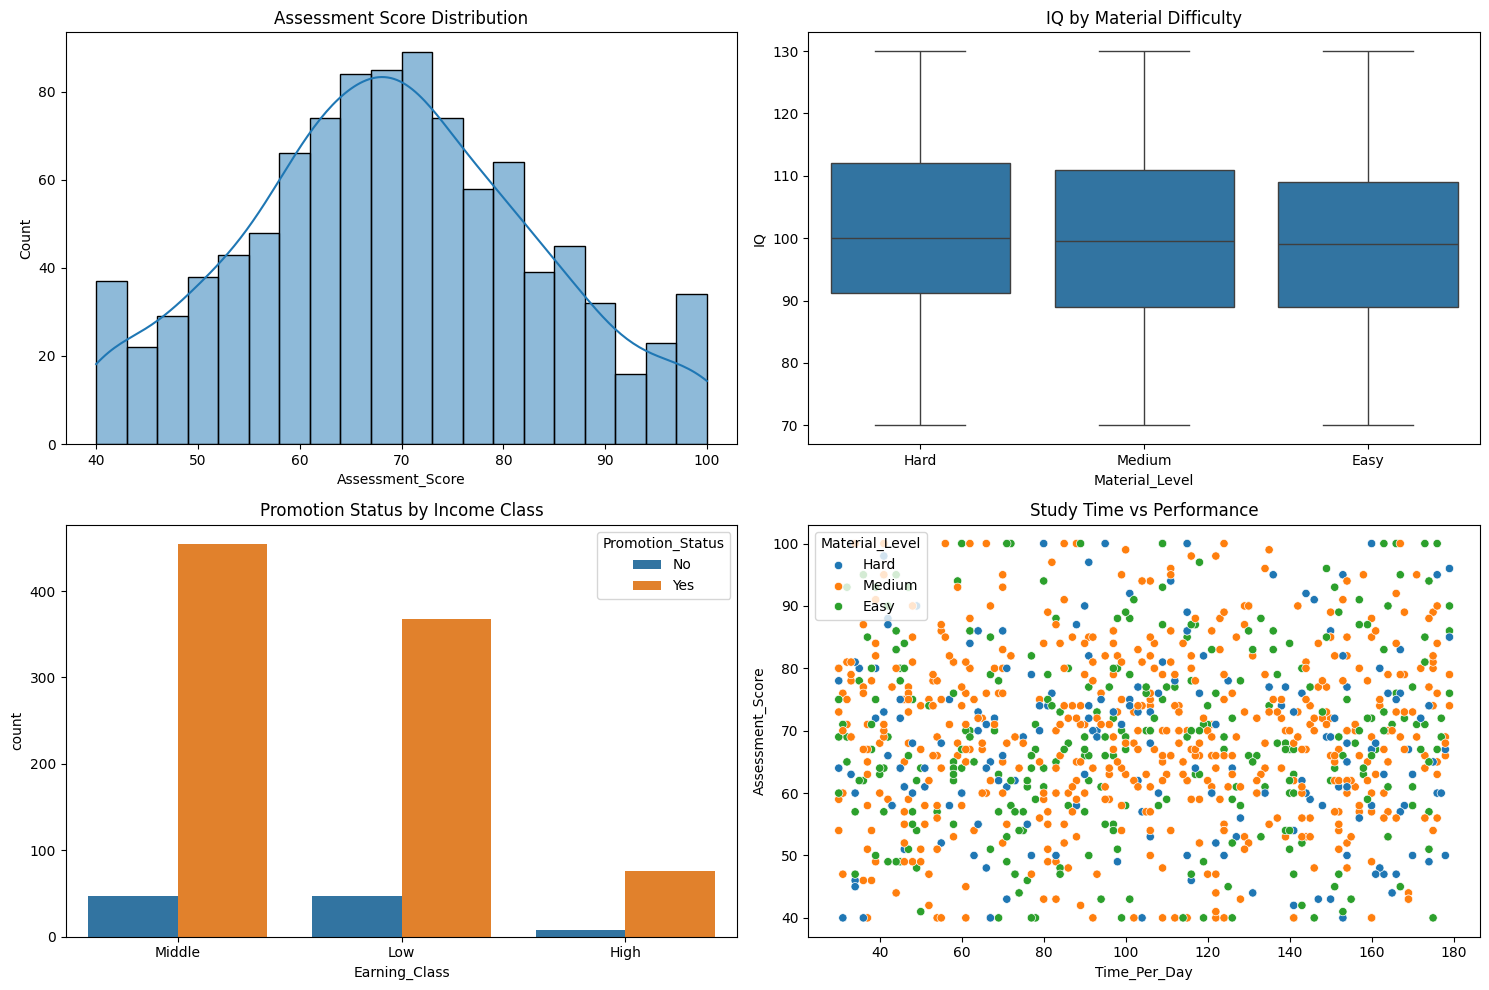

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('k12_tutoring_dataset.csv')


print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


print("\nNumeric stats:\n", df.describe())


print("\nCategorical stats:\n", df.describe(include='object'))

plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
sns.histplot(df['Assessment_Score'], bins=20, kde=True)
plt.title("Assessment Score Distribution")


plt.subplot(2,2,2)
sns.boxplot(x='Material_Level', y='IQ', data=df)
plt.title("IQ by Material Difficulty")


plt.subplot(2,2,3)
sns.countplot(x='Earning_Class', hue='Promotion_Status', data=df)
plt.title("Promotion Status by Income Class")

plt.subplot(2,2,4)
sns.scatterplot(x='Time_Per_Day', y='Assessment_Score', hue='Material_Level', data=df)
plt.title("Study Time vs Performance")

plt.tight_layout()
plt.show()

Promotion Prediction Accuracy: 0.895
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.90      1.00      0.94       179

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



c:\Users\DC\OneDrive\Desktop\git\intel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DC\OneDrive\Desktop\git\intel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DC\OneDrive\Desktop\git\intel\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

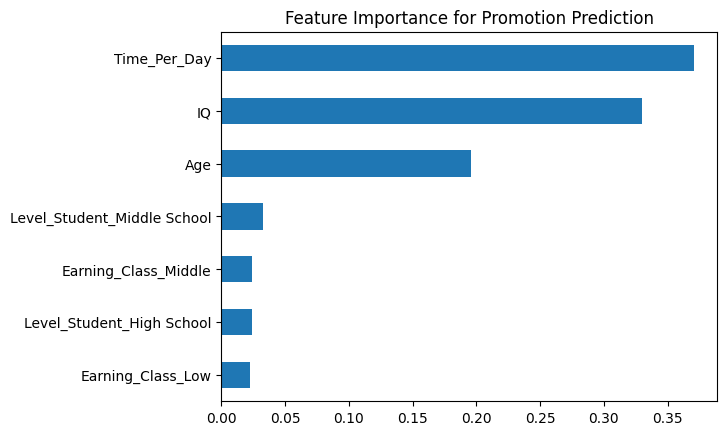

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


df['Promotion_Status'] = df['Assessment_Score'].apply(lambda x: 1 if x >= 50 else 0)  # Convert to binary
X = pd.get_dummies(df[['Age', 'IQ', 'Time_Per_Day', 'Earning_Class', 'Level_Student']], drop_first=True)
y = df['Promotion_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Promotion Prediction Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


pd.Series(model.feature_importances_, index=X.columns).sort_values().plot.barh()
plt.title("Feature Importance for Promotion Prediction")
plt.show()

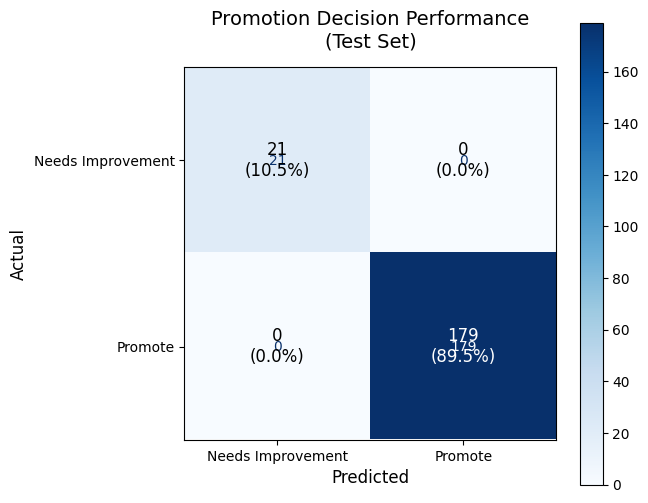

In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv('k12_tutoring_dataset.csv') 


X = df[['Age', 'IQ', 'Time_Per_Day', 'Assessment_Score']]
y = df['Promotion_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Needs Improvement', 'Promote'])

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap='Blues', ax=ax, values_format='d')

for i in range(2):
    for j in range(2):
        ax.text(j, i, f"{cm[i, j]}\n({cm[i, j]/len(y_test):.1%})",
                ha='center', va='center',
                color='white' if cm[i, j] > cm.max()/2 else 'black',
                fontsize=12)

plt.title('Promotion Decision Performance\n(Test Set)', fontsize=14, pad=15)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.grid(False)
plt.show()

In [ ]:

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Material_Level_Encoded'] = le.fit_transform(df['Material_Level'])


X_mat = pd.get_dummies(df[['Age', 'IQ', 'Assessment_Score', 'Level_Student']], drop_first=True)
y_mat = df['Material_Level_Encoded']


X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size=0.2, random_state=42)
material_model = RandomForestClassifier()
material_model.fit(X_train_mat, y_train_mat)


y_pred_mat = material_model.predict(X_test_mat)
print("\nMaterial Recommendation Accuracy:", accuracy_score(y_test_mat, y_pred_mat))
print(classification_report(y_test_mat, y_pred_mat, target_names=le.classes_))


Material Recommendation Accuracy: 0.515
              precision    recall  f1-score   support

        Easy       0.32      0.23      0.27        56
        Hard       0.23      0.09      0.12        35
      Medium       0.60      0.80      0.68       109

    accuracy                           0.52       200
   macro avg       0.38      0.37      0.36       200
weighted avg       0.45      0.52      0.47       200



In [ ]:

def adjust_material_level(row):
    if row['Assessment_Score'] < 50:
        return 'Easy'
    elif row['Assessment_Score'] < 75:
        return 'Medium'
    else:
        return 'Hard'


df['Suggested_Material'] = df.apply(adjust_material_level, axis=1)

print("\nMaterial Level Adjustment Summary:")
print(pd.crosstab(df['Material_Level'], df['Suggested_Material']))


Material Level Adjustment Summary:
Suggested_Material  Easy  Hard  Medium
Material_Level                        
Easy                  34    95     161
Hard                  22    60     108
Medium                46   181     293


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)


N_STUDENTS = 1000
COUNTRIES = ['USA', 'India', 'UK', 'Canada', 'Australia']
STATES = {
    'USA': ['California', 'Texas', 'New York'],
    'India': ['Maharashtra', 'Karnataka', 'Tamil Nadu'],
    'UK': ['England', 'Scotland', 'Wales'],
    'Canada': ['Ontario', 'Quebec', 'BC'],
    'Australia': ['NSW', 'Victoria', 'Queensland']
}
CITIES = {
    'California': ['Los Angeles', 'San Francisco'],
    'Maharashtra': ['Mumbai', 'Pune'],
    'England': ['London', 'Manchester'],
    
}
OCCUPATIONS = ['Engineer', 'Teacher', 'Doctor', 'Farmer', 'Business', 'Unemployed']
COURSES = ['Math', 'Science', 'History', 'Literature', 'Computer Science']


data = {
    
    'Name': [f'Student_{i}' for i in range(1, N_STUDENTS+1)],
    'Age': np.random.randint(6, 18, N_STUDENTS),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], N_STUDENTS),
    
    
    'Country': np.random.choice(COUNTRIES, N_STUDENTS),
    'State': None,  
    'City': None,   
    
    'Parent_Occupation': np.random.choice(OCCUPATIONS, N_STUDENTS, p=[0.3, 0.2, 0.1, 0.15, 0.2, 0.05]),
    'Earning_Class': np.random.choice(['Low', 'Middle', 'High'], N_STUDENTS, p=[0.4, 0.5, 0.1]),
    
    
    'Level_Student': np.random.choice(['Elementary', 'Middle School', 'High School'], N_STUDENTS),
    'Level_Course': np.random.choice(['Beginner', 'Intermediate', 'Advanced'], N_STUDENTS),
    'Course_Name': np.random.choice(COURSES, N_STUDENTS),
    'Assessment_Score': np.clip(np.random.normal(70, 15, N_STUDENTS).astype(int), 40, 100),
    'Time_Per_Day': np.random.randint(30, 180, N_STUDENTS),
    'Material_Level': np.random.choice(['Easy', 'Medium', 'Hard'], N_STUDENTS, p=[0.3, 0.5, 0.2]),
    'IQ': np.clip(np.random.normal(100, 15, N_STUDENTS).astype(int), 70, 130)
}


df = pd.DataFrame(data)


df['State'] = df['Country'].apply(lambda x: np.random.choice(STATES[x]))
df['City'] = df.apply(lambda row: np.random.choice(CITIES.get(row['State'], ['Unknown'])), axis=1)


df['Promotion_Status'] = np.where(df['Assessment_Score'] >= 50, 'Yes', 'No')


df.to_csv('k12_tutoring_dataset.csv', index=False)
print("✅ Dataset generated: k12_tutoring_dataset.csv")
print(df.head())

✅ Dataset generated: k12_tutoring_dataset.csv
        Name  Age  Gender    Country       State           City  \
0  Student_1   12  Female     Canada      Quebec        Unknown   
1  Student_2    9   Other     Canada      Quebec        Unknown   
2  Student_3   16  Female  Australia    Victoria        Unknown   
3  Student_4   13  Female        USA  California  San Francisco   
4  Student_5   10  Female  Australia    Victoria        Unknown   

  Parent_Occupation Earning_Class  Level_Student  Level_Course  \
0        Unemployed        Middle     Elementary      Beginner   
1          Engineer        Middle    High School  Intermediate   
2          Engineer           Low     Elementary      Advanced   
3          Engineer        Middle  Middle School      Beginner   
4          Business           Low  Middle School      Beginner   

        Course_Name  Assessment_Score  Time_Per_Day Material_Level   IQ  \
0           Science                44           131           Hard  119   
1   

In [ ]:
%pip install pandas numpy scikit-learn seaborn matplotlib gradio

Note: you may need to restart the kernel to use updated packages.
